In [2]:
%run "..\data_cleaning\data_preprocessing.ipynb"
from ast import literal_eval

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [4]:
df = pd.read_csv("../../new_df.csv")
df.drop(columns="Unnamed: 0", inplace=True)
df['left_closest'] = df['left_closest'].apply(literal_eval)
df['right_closest'] = df['right_closest'].apply(literal_eval)

In [5]:
left_df = clean_left()
right_df = clean_right()

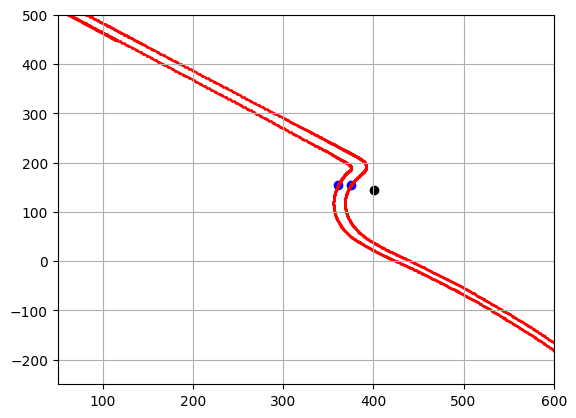

In [6]:
plt.scatter(375.0137634277344, 153.8986053466797,c='blue')
plt.scatter(361.1746826171875, 154.93446350097656,c='blue')
plt.scatter(400.168121, 144.189819,c='black')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.grid(True)
plt.xlim(50, 600)
plt.ylim(-250, 500)
# plt.xlim(100, 120)
# plt.ylim(450, 470)
plt.show()

In [7]:
df["left_closest"][0][0]

116.08881378173828

In [8]:
left_closest_x = []
left_closest_y = []
right_closest_x = []
right_closest_y = []
for row in df.iterrows():
    left_closest_x.append(row[1][31][0])
    left_closest_y.append(row[1][31][1])
    right_closest_x.append(row[1][32][0])
    right_closest_y.append(row[1][32][1])
df["left_closest_x"] = left_closest_x
df["left_closest_y"] = left_closest_y
df["right_closest_x"] = right_closest_x
df["right_closest_y"] = right_closest_y


In [9]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10541.0,-0.018082,-2.336760,0.004231,-0.025839,113.192245,465.303589,2.900799,-23615.0,-138.0,-22714.0,22704.0,846.0,-23610.0,3.455802,10.174289,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)",116.088814,467.188385,105.453957,458.697906
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10547.0,-0.018174,-2.333671,0.005806,-0.025955,116.142723,462.470612,2.874730,-23685.0,-190.0,-22641.0,22630.0,850.0,-23681.0,3.365434,10.182519,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)",118.381073,464.983765,109.808960,454.497711
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,38528.0,295.0,1.0,0.031952,8.0,10563.0,-0.013687,-2.330126,0.005979,-0.024798,119.108170,459.637115,2.845881,-23765.0,-195.0,-22557.0,22547.0,812.0,-23761.0,3.497007,10.153931,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)",121.621696,462.068420,112.191628,452.203156
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,38528.0,295.0,1.0,0.032959,8.0,10581.0,-0.000687,-2.327518,0.005315,-0.024717,122.087158,456.805298,2.821898,-23824.0,-174.0,-22495.0,22485.0,809.0,-23820.0,3.361903,10.176946,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)",124.038795,459.542725,114.978645,449.522491
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,38528.0,296.0,1.0,0.032959,8.0,10598.0,0.004532,-2.326889,0.004296,-0.025042,125.073685,453.976288,2.798889,-23838.0,-140.0,-22480.0,22471.0,820.0,-23833.0,3.361401,10.242086,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)",127.842636,455.882050,117.375343,447.220856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278104,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,40311.0,286.0,1.0,0.000000,7.0,11612.0,-0.023575,-2.470974,0.001521,0.026114,589.105957,-163.532379,2.951605,-20363.0,-49.0,-25670.0,25662.0,-855.0,-20355.0,7.333521,2.523359,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)",595.011292,-159.184097,587.880310,-165.738083
278105,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,40311.0,287.0,1.0,0.000000,7.0,11638.0,-0.010391,-2.467247,0.002859,0.025564,591.606812,-166.642609,2.946570,-20459.0,-93.0,-25594.0,25587.0,-837.0,-20450.0,7.352190,2.344569,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)",597.092346,-161.747345,589.733826,-168.052902
278106,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11656.0,0.020005,-2.465186,0.001786,0.027223,594.108887,-169.762772,2.934201,-20511.0,-58.0,-25552.0,25544.0,-891.0,-20503.0,7.431272,2.393826,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)",599.169495,-164.320892,592.514099,-171.548004
278107,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11682.0,0.033371,-2.468329,0.002658,0.027420,596.614502,-172.896118,2.921854,-20431.0,-87.0,-25616.0,25608.0,-898.0,-20422.0,8.947764,2.388831,"(599.1694946289062, -164.32089233398438)","(594.6680908203125, -174.28103637695312)",599.169495,-164.320892,594.668091,-174.281036


In [10]:
df["track_width"] = np.sqrt((df["left_closest_x"]-df["right_closest_x"])**2+(df["left_closest_y"]-df["right_closest_y"])**2)

In [11]:
df["track_ratio_left"] = df["left_shortest"]/df["track_width"]
df["track_ratio_right"] = df["right_shortest"]/df["track_width"]

In [12]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10541.0,-0.018082,-2.336760,0.004231,-0.025839,113.192245,465.303589,2.900799,-23615.0,-138.0,-22714.0,22704.0,846.0,-23610.0,3.455802,10.174289,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)",116.088814,467.188385,105.453957,458.697906,13.608395,0.253946,0.747648
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10547.0,-0.018174,-2.333671,0.005806,-0.025955,116.142723,462.470612,2.874730,-23685.0,-190.0,-22641.0,22630.0,850.0,-23681.0,3.365434,10.182519,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)",118.381073,464.983765,109.808960,454.497711,13.543945,0.248483,0.751813
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,38528.0,295.0,1.0,0.031952,8.0,10563.0,-0.013687,-2.330126,0.005979,-0.024798,119.108170,459.637115,2.845881,-23765.0,-195.0,-22557.0,22547.0,812.0,-23761.0,3.497007,10.153931,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)",121.621696,462.068420,112.191628,452.203156,13.647331,0.256241,0.744023
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,38528.0,295.0,1.0,0.032959,8.0,10581.0,-0.000687,-2.327518,0.005315,-0.024717,122.087158,456.805298,2.821898,-23824.0,-174.0,-22495.0,22485.0,809.0,-23820.0,3.361903,10.176946,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)",124.038795,459.542725,114.978645,449.522491,13.508938,0.248865,0.753349
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,38528.0,296.0,1.0,0.032959,8.0,10598.0,0.004532,-2.326889,0.004296,-0.025042,125.073685,453.976288,2.798889,-23838.0,-140.0,-22480.0,22471.0,820.0,-23833.0,3.361401,10.242086,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)",127.842636,455.882050,117.375343,447.220856,13.586041,0.247416,0.753868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278104,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,40311.0,286.0,1.0,0.000000,7.0,11612.0,-0.023575,-2.470974,0.001521,0.026114,589.105957,-163.532379,2.951605,-20363.0,-49.0,-25670.0,25662.0,-855.0,-20355.0,7.333521,2.523359,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)",595.011292,-159.184097,587.880310,-165.738083,9.685330,0.757178,0.260534
278105,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,40311.0,287.0,1.0,0.000000,7.0,11638.0,-0.010391,-2.467247,0.002859,0.025564,591.606812,-166.642609,2.946570,-20459.0,-93.0,-25594.0,25587.0,-837.0,-20450.0,7.352190,2.344569,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)",597.092346,-161.747345,589.733826,-168.052902,9.690608,0.758692,0.241942
278106,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11656.0,0.020005,-2.465186,0.001786,0.027223,594.108887,-169.762772,2.934201,-20511.0,-58.0,-25552.0,25544.0,-891.0,-20503.0,7.431272,2.393826,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)",599.169495,-164.320892,592.514099,-171.548004,9.824736,0.756384,0.243653
278107,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11682.0,0.033371,-2.468329,0.002658,0.027420,596.614502,-172.896118,2.92185

In [13]:
df.iloc[7738]

LAP_INDEX                                                   55
SESSION_IDENTIFIER                      10674158181360488448.0
FRAME                                                     1470
LAP_NUM                                                      1
SECTOR                                                       1
LAP_DISTANCE                                        420.393677
CURRENT_LAP_TIME_MS                                       8792
SECTOR_1_TIME_MS                                         21550
SECTOR_2_TIME_MS                                         41980
LAP_TIME_MS                                           222534.0
SECTOR_3_MS                                           159004.0
SPEED_KPH                                                154.0
THROTTLE                                                   0.0
BRAKE                                                      0.0
GEAR                                                       4.0
ENGINE_RPM                                             

In [14]:
df.iloc[0]

LAP_INDEX                                                    1
SESSION_IDENTIFIER                      10034676866664400896.0
FRAME                                                     1680
LAP_NUM                                                      1
SECTOR                                                       1
LAP_DISTANCE                                          1.775714
CURRENT_LAP_TIME_MS                                         16
SECTOR_1_TIME_MS                                         30129
SECTOR_2_TIME_MS                                         18569
LAP_TIME_MS                                            87226.0
SECTOR_3_MS                                            38528.0
SPEED_KPH                                                294.0
THROTTLE                                                   1.0
BRAKE                                                 0.030945
GEAR                                                       8.0
ENGINE_RPM                                             

In [15]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10541.0,-0.018082,-2.336760,0.004231,-0.025839,113.192245,465.303589,2.900799,-23615.0,-138.0,-22714.0,22704.0,846.0,-23610.0,3.455802,10.174289,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)",116.088814,467.188385,105.453957,458.697906,13.608395,0.253946,0.747648
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10547.0,-0.018174,-2.333671,0.005806,-0.025955,116.142723,462.470612,2.874730,-23685.0,-190.0,-22641.0,22630.0,850.0,-23681.0,3.365434,10.182519,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)",118.381073,464.983765,109.808960,454.497711,13.543945,0.248483,0.751813
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,38528.0,295.0,1.0,0.031952,8.0,10563.0,-0.013687,-2.330126,0.005979,-0.024798,119.108170,459.637115,2.845881,-23765.0,-195.0,-22557.0,22547.0,812.0,-23761.0,3.497007,10.153931,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)",121.621696,462.068420,112.191628,452.203156,13.647331,0.256241,0.744023
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,38528.0,295.0,1.0,0.032959,8.0,10581.0,-0.000687,-2.327518,0.005315,-0.024717,122.087158,456.805298,2.821898,-23824.0,-174.0,-22495.0,22485.0,809.0,-23820.0,3.361903,10.176946,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)",124.038795,459.542725,114.978645,449.522491,13.508938,0.248865,0.753349
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,38528.0,296.0,1.0,0.032959,8.0,10598.0,0.004532,-2.326889,0.004296,-0.025042,125.073685,453.976288,2.798889,-23838.0,-140.0,-22480.0,22471.0,820.0,-23833.0,3.361401,10.242086,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)",127.842636,455.882050,117.375343,447.220856,13.586041,0.247416,0.753868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278104,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,40311.0,286.0,1.0,0.000000,7.0,11612.0,-0.023575,-2.470974,0.001521,0.026114,589.105957,-163.532379,2.951605,-20363.0,-49.0,-25670.0,25662.0,-855.0,-20355.0,7.333521,2.523359,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)",595.011292,-159.184097,587.880310,-165.738083,9.685330,0.757178,0.260534
278105,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,40311.0,287.0,1.0,0.000000,7.0,11638.0,-0.010391,-2.467247,0.002859,0.025564,591.606812,-166.642609,2.946570,-20459.0,-93.0,-25594.0,25587.0,-837.0,-20450.0,7.352190,2.344569,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)",597.092346,-161.747345,589.733826,-168.052902,9.690608,0.758692,0.241942
278106,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11656.0,0.020005,-2.465186,0.001786,0.027223,594.108887,-169.762772,2.934201,-20511.0,-58.0,-25552.0,25544.0,-891.0,-20503.0,7.431272,2.393826,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)",599.169495,-164.320892,592.514099,-171.548004,9.824736,0.756384,0.243653
278107,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11682.0,0.033371,-2.468329,0.002658,0.027420,596.614502,-172.896118,2.92185

In [16]:
trial_df = df[df["track_ratio_left"]+df["track_ratio_right"]>1.1]

In [17]:
on_track_df = df[df["track_ratio_left"]+df["track_ratio_right"]<1.1]

In [18]:
trial_df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right
699,7,1.004645e+19,1787,1,1,416.168274,6081,30395,18780,85724.0,36549.0,139.0,0.037812,0.0,3.0,10016.0,0.324605,2.872319,0.013104,0.006491,379.740021,162.848618,2.518523,8716.0,-429.0,-31583.0,31584.0,-212.0,8719.0,0.880877,15.093638,"(379.1939086914063, 163.53977966308594)","(365.7731628417969, 168.5709228515625)",379.193909,163.539780,365.773163,168.570923,14.332788,0.061459,1.053085
700,7,1.004645e+19,1788,1,1,418.227966,6147,30395,18780,85724.0,36549.0,138.0,0.123415,0.0,3.0,10019.0,0.300893,2.831383,0.009116,-0.000110,379.065857,160.355774,2.493201,10001.0,-298.0,-31201.0,31203.0,3.0,10002.0,1.262800,15.357521,"(378.0064697265625, 161.04306030273438)","(364.6378479003906, 165.61752319335938)",378.006470,161.043060,364.637848,165.617523,14.129606,0.089373,1.086904
701,7,1.004645e+19,1789,1,1,419.801453,6197,30395,18780,85724.0,36549.0,138.0,0.188022,0.0,3.0,9971.0,0.274891,2.803678,0.008890,0.002696,378.500916,158.509186,2.470426,10862.0,-291.0,-30912.0,30913.0,-88.0,10863.0,1.490754,15.456070,"(377.1744384765625, 159.18948364257812)","(364.01373291015625, 163.8954315185547)",377.174438,159.189484,364.013733,163.895432,13.976771,0.106659,1.105840
702,7,1.004645e+19,1790,1,1,422.070953,6264,30395,18780,85724.0,36549.0,138.0,0.278874,0.0,3.0,10002.0,0.182422,2.769492,0.005825,-0.004164,377.657318,156.082764,2.452470,11913.0,-190.0,-30524.0,30524.0,136.0,11912.0,1.674816,15.439984,"(376.0344848632813, 156.49679565429688)","(362.9022521972656, 160.6304168701172)",376.034485,156.496796,362.902252,160.630417,13.767438,0.121651,1.121486
703,7,1.004645e+19,1791,1,1,423.913361,6314,30395,18780,85724.0,36549.0,138.0,0.317739,0.0,3.0,10145.0,0.107897,2.749012,0.007459,0.004582,376.971252,154.281219,2.442217,12535.0,-244.0,-30273.0,30273.0,-150.0,12536.0,1.705935,15.334703,"(375.47998046875, 155.1096649169922)","(362.3553771972656, 158.9211883544922)",375.479980,155.109665,362.355377,158.921188,13.666855,0.124823,1.122036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277798,1358,9.988606e+18,1147,1,1,634.442261,11302,32910,19314,91460.0,39236.0,220.0,1.000000,0.0,5.0,11934.0,-0.054612,-2.284406,0.001673,-0.001827,447.691711,-20.995167,2.987421,-24771.0,-54.0,-21448.0,21448.0,59.0,-24772.0,11.393963,1.491024,"(454.918212890625, -12.186076164245604)","(449.1012878417969, -20.509113311767575)",454.918213,-12.186076,449.101288,-20.509113,10.154288,1.122084,0.146837
277799,1358,9.988606e+18,1148,1,1,638.554138,11369,32910,19314,91460.0,39236.0,221.0,1.000000,0.0,5.0,12096.0,-0.087114,-2.268790,0.005907,0.002963,450.779785,-23.682878,2.971196,-25103.0,-193.0,-21058.0,21059.0,-97.0,-25103.0,11.284435,1.318170,"(458.849853515625, -15.795390129089355)","(451.8915710449219, -22.974708557128903)",458.849854,-15.795390,451.891571,-22.974709,9.998015,1.128668,0.131843
277800,1358,9.988606e+18,1150,1,1,641.657776,11419,32910,19314,91460.0,39236.0,222.0,1.000000,0.0,6.0,10240.0,-0.108354,-2.254088,0.005458,0.005213,453.143646,-25.676096,2.947119,-25410.0,-178.0,-20687.0,20687.0,-170.0,-25409.0,11.119469,1.274160,"(460.662841796875, -17.484375)","(453.57525634765625, -24.477264404296875)",460.662842,-17.484375,453.575256,-24.477264,9.956624,1.116791,0.127971
277801,1358,9.988606e+18,1151,1,1,645.810303,11486,32910,19314,91460.0,39236.0,224.0,1.000000,0.0,6.0,10319.0,-0.083543,-2.232872,0.005941,0.011923,456.358276,-28.287598,2.924145,-25843.0,-19

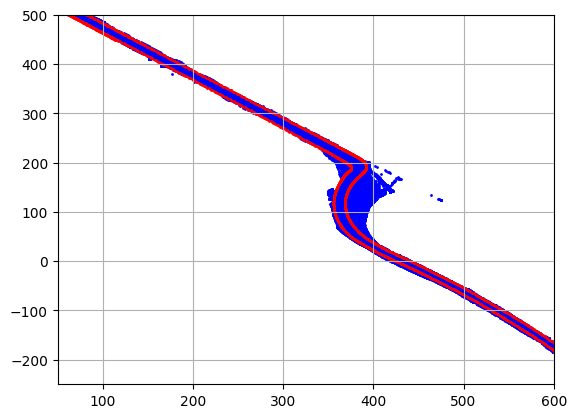

In [19]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"],s=1,c='blue')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.grid(True)
plt.xlim(50, 600)
plt.ylim(-250, 500)
plt.show()

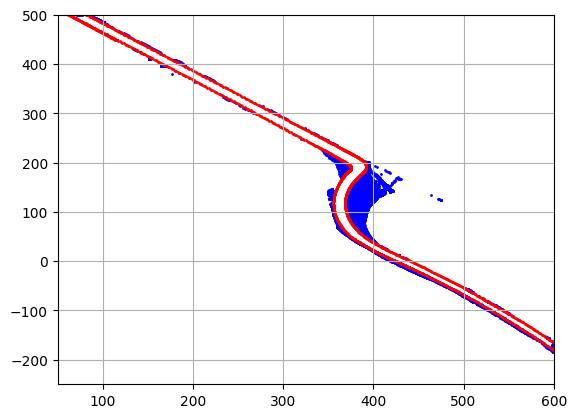

In [20]:
plt.scatter(trial_df["WORLDPOSX"], trial_df["WORLDPOSY"],s=1,c='blue')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.grid(True)
plt.xlim(50, 600)
plt.ylim(-250, 500)
plt.show()

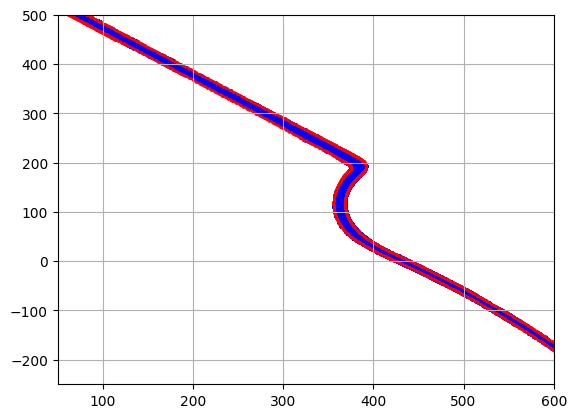

In [21]:
plt.scatter(on_track_df["WORLDPOSX"], on_track_df["WORLDPOSY"],s=1,c='blue')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.grid(True)
plt.xlim(50, 600)
plt.ylim(-250, 500)
plt.show()

In [22]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10541.0,-0.018082,-2.336760,0.004231,-0.025839,113.192245,465.303589,2.900799,-23615.0,-138.0,-22714.0,22704.0,846.0,-23610.0,3.455802,10.174289,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)",116.088814,467.188385,105.453957,458.697906,13.608395,0.253946,0.747648
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,38528.0,294.0,1.0,0.030945,8.0,10547.0,-0.018174,-2.333671,0.005806,-0.025955,116.142723,462.470612,2.874730,-23685.0,-190.0,-22641.0,22630.0,850.0,-23681.0,3.365434,10.182519,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)",118.381073,464.983765,109.808960,454.497711,13.543945,0.248483,0.751813
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,38528.0,295.0,1.0,0.031952,8.0,10563.0,-0.013687,-2.330126,0.005979,-0.024798,119.108170,459.637115,2.845881,-23765.0,-195.0,-22557.0,22547.0,812.0,-23761.0,3.497007,10.153931,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)",121.621696,462.068420,112.191628,452.203156,13.647331,0.256241,0.744023
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,38528.0,295.0,1.0,0.032959,8.0,10581.0,-0.000687,-2.327518,0.005315,-0.024717,122.087158,456.805298,2.821898,-23824.0,-174.0,-22495.0,22485.0,809.0,-23820.0,3.361903,10.176946,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)",124.038795,459.542725,114.978645,449.522491,13.508938,0.248865,0.753349
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,38528.0,296.0,1.0,0.032959,8.0,10598.0,0.004532,-2.326889,0.004296,-0.025042,125.073685,453.976288,2.798889,-23838.0,-140.0,-22480.0,22471.0,820.0,-23833.0,3.361401,10.242086,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)",127.842636,455.882050,117.375343,447.220856,13.586041,0.247416,0.753868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278104,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,40311.0,286.0,1.0,0.000000,7.0,11612.0,-0.023575,-2.470974,0.001521,0.026114,589.105957,-163.532379,2.951605,-20363.0,-49.0,-25670.0,25662.0,-855.0,-20355.0,7.333521,2.523359,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)",595.011292,-159.184097,587.880310,-165.738083,9.685330,0.757178,0.260534
278105,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,40311.0,287.0,1.0,0.000000,7.0,11638.0,-0.010391,-2.467247,0.002859,0.025564,591.606812,-166.642609,2.946570,-20459.0,-93.0,-25594.0,25587.0,-837.0,-20450.0,7.352190,2.344569,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)",597.092346,-161.747345,589.733826,-168.052902,9.690608,0.758692,0.241942
278106,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11656.0,0.020005,-2.465186,0.001786,0.027223,594.108887,-169.762772,2.934201,-20511.0,-58.0,-25552.0,25544.0,-891.0,-20503.0,7.431272,2.393826,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)",599.169495,-164.320892,592.514099,-171.548004,9.824736,0.756384,0.243653
278107,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,40311.0,288.0,1.0,0.000000,7.0,11682.0,0.033371,-2.468329,0.002658,0.027420,596.614502,-172.896118,2.92185

In [23]:
df.to_csv('track_ratio.csv')